**任务时间：题目1-3（11.05-11.10）
题目4、5（11.12-11.17）
题目6（11.19-11.25）**

**互评与筛选时间：题目1-3（11.11）
题目4、5（11.18）
题目6（11.26）**

每周只用提交相应的部分到自己的git，试题实行每周淘汰制

新互评链接：https://yiqixie.com/s/home/fcACT-kZRz10FXWBU2jXDt8VO

# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定


In [4]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'C:\Users\WSQ\Desktop\信号试题\min_data\VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}

Time_dict = ds.bar_reader(path,props)

In [5]:
from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()

In [6]:
dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


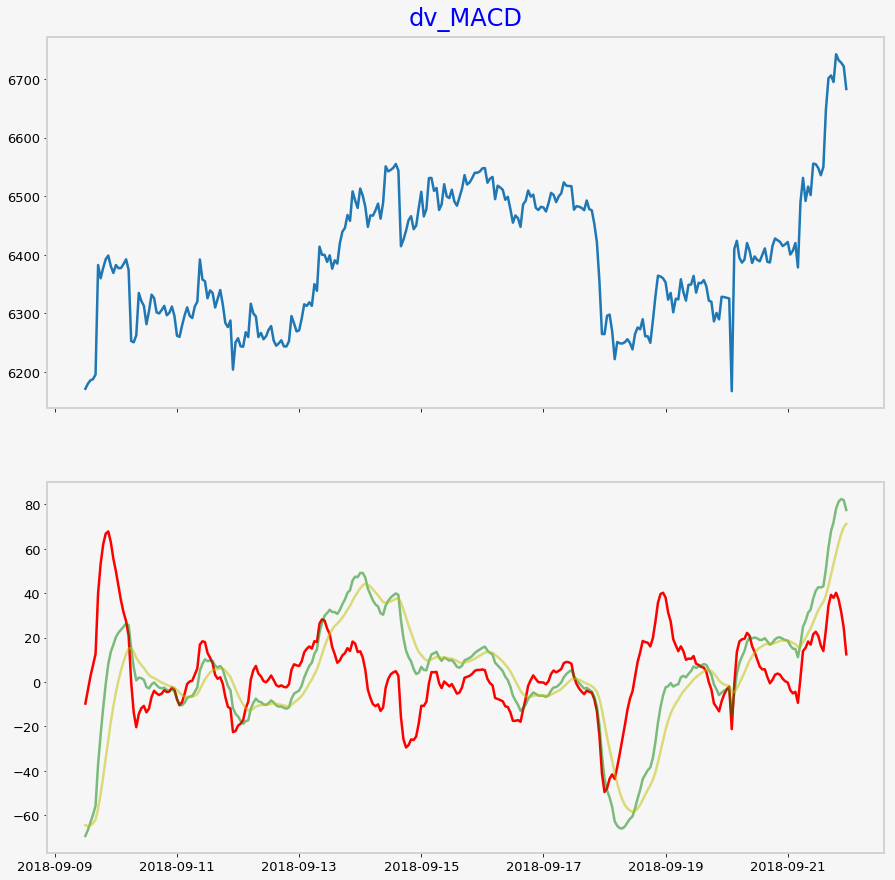

In [26]:
dv1H.add_formula('Diff_J',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)",add_data=True,)
dv1H.add_formula('Dea_J',"Ta('EMA',0,0,0,0,Diff_J,0,9)",add_data=True,)
dv1H.add_formula('MACD_J',"(Diff_J-Dea_J)*2",add_data=True,)

import matplotlib.pyplot as plt
import pandas as pd

def Plot_MACD(dv, MACD_J, Diff_J,Dea_J,chart_name='dv_MACD', n=-1500):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(MACD_J.iloc[n:],alpha=1,color = 'r')
    ax1.plot(Diff_J.iloc[n:],alpha=0.5,color = 'g')
    ax1.plot(Dea_J.iloc[n:],alpha=0.5,color="y")
    plt.show()
    
MACD_J = dv1H.get_ts('MACD_J',date_type = 'datetime')
Diff_J = dv1H.get_ts('Diff_J',date_type = 'datetime')
Dea_J = dv1H.get_ts('Dea_J',date_type = 'datetime')
Plot_MACD(dv1H, MACD_J.iloc[:,0], Diff_J.iloc[:,0], Dea_J.iloc[:,0],n=-300)

第一个因子为MACD因子，当Diff_J上穿Dea_J且Diff_J>0和Dea_J>0则开多单。当Dea_J上穿Diff_J且Diff_J<0和Dea_J<0则开空单。

D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:486: RuntimeWarning: invalid value encountered in less
  res = arr < brr


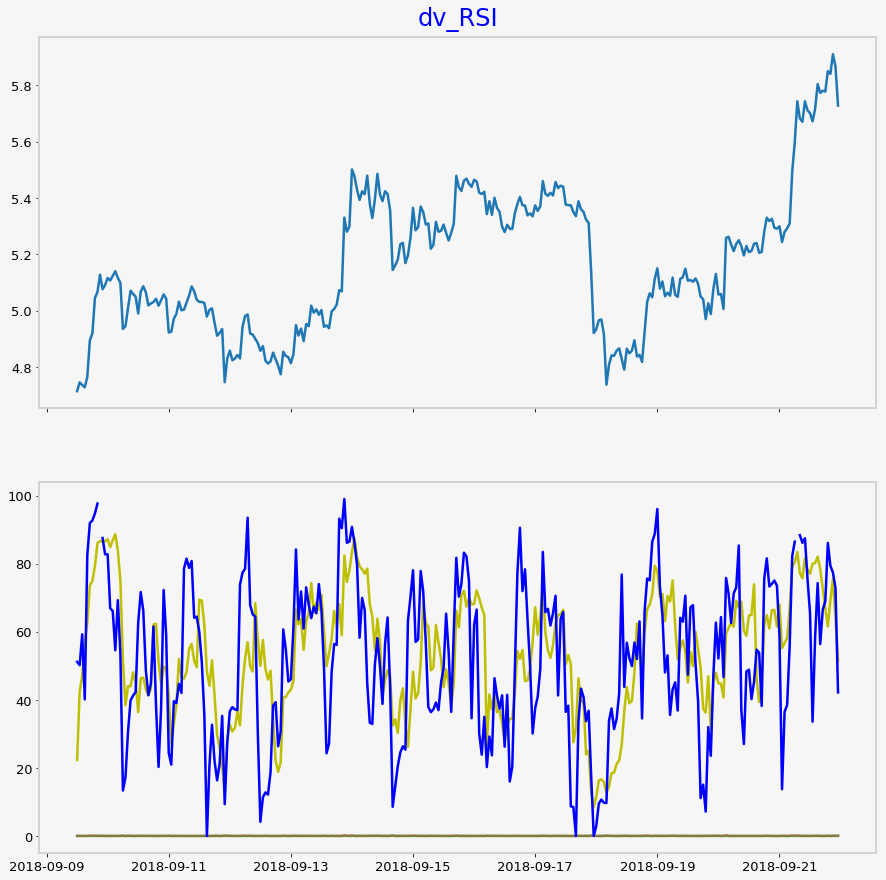

In [13]:
dv1H.add_formula('Ui', """If(close>Delay(close, 1),close-Delay(close, 1),If(close<Delay(close, 1), 0, 0))""", add_data=True)
dv1H.add_formula('Di',"""If(close>Delay(close, 1),0,If(close<Delay(close, 1), Delay(close, 1)-close, 0))""", add_data=True)
dv1H.add_formula('RSI_J_12',"100-100/(1+(Ta('MA',0,Ui,Ui,Ui,Ui,Ui,12)/Ta('MA',0,Di,Di,Di,Di,Di,12)))",add_data=True)
dv1H.add_formula('RSI_J_6',"100-100/(1+(Ta('MA',0,Ui,Ui,Ui,Ui,Ui,6)/Ta('MA',0,Di,Di,Di,Di,Di,6)))",add_data=True)
import matplotlib.pyplot as plt
import pandas as pd

def Plot_MACD(dv,Ui,Di,RSI_J_12,RSI_J_6,chart_name='dv_RSI', n=-1500):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(Ui.iloc[n:],alpha=0.5,color = 'r')
    ax1.plot(Di.iloc[n:],alpha=0.5,color = 'g')
    ax1.plot(RSI_J_12.iloc[n:],alpha=1,color="y")
    ax1.plot(RSI_J_6.iloc[n:],alpha=1,color="b")
    plt.show()
    
Ui = dv1H.get_ts('Ui',date_type = 'datetime')
Di = dv1H.get_ts('Di',date_type = 'datetime')
RSI_J_12 = dv1H.get_ts('RSI_J_12',date_type = 'datetime')
RSI_J_6 = dv1H.get_ts('RSI_J_6',date_type = 'datetime')
Plot_MACD(dv1H, Ui.iloc[:,0],Di.iloc[:,0],RSI_J_12.iloc[:,0],RSI_J_6.iloc[:,0],n=-300)

RSI_J_6上穿RSI_J_12，或者RSI_J_12大于50即开多单。RSI_J_12下穿RSI_J_6或者RSI_J_12下穿50开空单

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么



第一个因子为MACD因子，当Diff_J上穿Dea_J且Diff_J>0和Dea_J>0则开多单。当Dea_J上穿Diff_J且Diff_J<0和Dea_J<0则开空单。

RSI_J_6上穿RSI_J_12，或者RSI_J_12大于50即开多单。RSI_J_12下穿RSI_J_6或者RSI_J_12下穿50开空单


# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来


In [6]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数
from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()

dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

start = time()
path = r'C:\Users\WSQ\Desktop\信号试题\min_data\VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}

Time_dict = ds.bar_reader(path,props)

dv1H.add_formula('Diff_J',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)",add_data=True,)
dv1H.add_formula('Dea_J',"Ta('EMA',0,0,0,0,Diff_J,0,9)",add_data=True,)
dv1H.add_formula('MACD_J',"(Diff_J-Dea_J)*2",add_data=True,)

long = dv1H.add_formula('longMACD','If((Diff_J>Dea_J) && (Delay(Diff_J,1)<=Delay(Dea_J,1))&&(Diff_J>0)&&(Dea_J>0),2,0)',add_data = True)    
short = dv1H.add_formula('shortMACD','If((Diff_J<=Dea_J) && (Delay(Diff_J,1)>Delay(Dea_J,1))&&(Diff_J<0)&&(Dea_J<0),-2,0)',add_data = True) 
#出场信号
close_long = dv1H.add_formula('closeLongMACD','If(longMACD==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortMACD','If(shortMACD==2,-1,0)',add_data = True)

dv1H.get_ts('longMACD').stack()[dv1H.get_ts('longMACD').stack()==2]
dv1H.get_ts('shortMACD').stack()[dv1H.get_ts('shortMACD').stack()==2]
from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longMACD', 'shortMACD', 'closeLongMACD', 'closeShortMACD', mhp=100, sl=0.05, sp=0.3)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Initialize dataview success.


D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:504: RuntimeWarning: invalid value encountered in less_equal
  res = arr <= brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:486: RuntimeWarning: invalid value encountered in less
  res = arr < brr


Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               6.743 -26.953   1.608
p-value              0.000   0.000   0.124
mean                 0.155  -0.060   0.042
std                  0.069   0.007   0.117
info_ratio           2.248  -8.523   0.359
skewness            -0.027  -0.523   0.535
kurtosis            -1.646  -1.110  -1.321
pct5                 0.066  -0.070  -0.068
pct25                0.086  -0.067  -0.057
pct50                0.154  -0.057  -0.051
pct75                0.228  -0.055   0.141
pct95                0.238  -0.052   0.233
occurance           10.000  11.000  21.000
win_ratio              NaN     NaN   0.476
win_mean/loss_mean     NaN     NaN   2.576
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               5.317 -30.784   1.953
p-value       

利用MACD因子测试EOSUSDT:binance

In [7]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数
from jaqs_fxdayu.data.hf_dataview import HFDataView

path = r'C:\Users\WSQ\Desktop\信号试题\min_data\VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'EOSUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}

dv1H = HFDataView()

dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

start = time()

Time_dict = ds.bar_reader(path,props)

dv1H.add_formula('Diff_J',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)",add_data=True,)
dv1H.add_formula('Dea_J',"Ta('EMA',0,0,0,0,Diff_J,0,9)",add_data=True,)
dv1H.add_formula('MACD_J',"(Diff_J-Dea_J)*2",add_data=True,)

long = dv1H.add_formula('longMACD','If((Diff_J>Dea_J) && (Delay(Diff_J,1)<=Delay(Dea_J,1))&&(Diff_J>0)&&(Dea_J>0),2,0)',add_data = True)    
short = dv1H.add_formula('shortMACD','If((Diff_J<=Dea_J) && (Delay(Diff_J,1)>Delay(Dea_J,1))&&(Diff_J<0)&&(Dea_J<0),-2,0)',add_data = True) 
#出场信号
close_long = dv1H.add_formula('closeLongMACD','If(longMACD==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortMACD','If(shortMACD==2,-1,0)',add_data = True)

dv1H.get_ts('longMACD').stack()[dv1H.get_ts('longMACD').stack()==2]
dv1H.get_ts('shortMACD').stack()[dv1H.get_ts('shortMACD').stack()==2]
from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longMACD', 'shortMACD', 'closeLongMACD', 'closeShortMACD', mhp=100, sl=0.05, sp=0.3)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Initialize dataview success.


D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:504: RuntimeWarning: invalid value encountered in less_equal
  res = arr <= brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:486: RuntimeWarning: invalid value encountered in less
  res = arr < brr


Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               7.302 -17.846  -1.123
p-value              0.000   0.000   0.265
mean                 0.062  -0.049  -0.008
std                  0.047   0.020   0.063
info_ratio           1.311  -2.451  -0.122
skewness             1.196   0.962   1.110
kurtosis             1.240   0.486   0.697
pct5                 0.005  -0.072  -0.071
pct25                0.034  -0.060  -0.056
pct50                0.043  -0.053  -0.033
pct75                0.086  -0.051   0.035
pct95                0.157  -0.004   0.101
occurance           32.000  54.000  86.000
win_ratio              NaN     NaN   0.372
win_mean/loss_mean     NaN     NaN   1.267
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               8.295 -16.401  -0.069
p-value       

利用RSI测试BTCUSDT:binance

In [8]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数
from jaqs_fxdayu.data.hf_dataview import HFDataView

path = r'C:\Users\WSQ\Desktop\信号试题\min_data\VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}

Time_dict = ds.bar_reader(path,props)
dv1H = HFDataView()

dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

start = time()


Time_dict = ds.bar_reader(path,props)


dv1H.add_formula('Ui', """If(close>Delay(close, 1),close-Delay(close, 1),If(close<Delay(close, 1), 0, 0))""", add_data=True)
dv1H.add_formula('Di',"""If(close>Delay(close, 1),0,If(close<Delay(close, 1), Delay(close, 1)-close, 0))""", add_data=True)
dv1H.add_formula('RSI_J_12',"100-100/(1+(Ta('MA',0,Ui,Ui,Ui,Ui,Ui,12)/Ta('MA',0,Di,Di,Di,Di,Di,12)))", add_data=True)
dv1H.add_formula('RSI_J_6',"100-100/(1+(Ta('MA',0,Ui,Ui,Ui,Ui,Ui,6)/Ta('MA',0,Di,Di,Di,Di,Di,6)))", add_data=True)

long = dv1H.add_formula('longKDJ','If((RSI_J_6>RSI_J_12)&&(Delay(RSI_J_6,1)<=Delay(RSI_J_12,1))&&(RSI_J_6<20)||(RSI_J_12>50&&(Delay(RSI_J_12,1)<=50)),2,0)',add_data = True)    
short = dv1H.add_formula('shortKDJ','If((RSI_J_6<RSI_J_12)&&(Delay(RSI_J_6,1)>=Delay(RSI_J_12,1))&&((RSI_J_6>80))||(RSI_J_12>50&&(Delay(RSI_J_12,1)<=50)),-2,0)',add_data = True)  
#出场信号
close_long = dv1H.add_formula('closeLongKDJ','If(longKDJ==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortKDJ','If(shortKDJ==2,-1,0)',add_data = True)

from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longKDJ', 'shortKDJ', 'closeLongKDJ', 'closeShortKDJ', mhp=100, sl=0.05, sp=0.3)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Initialize dataview success.


D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:486: RuntimeWarning: invalid value encountered in less
  res = arr < brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:504: RuntimeWarning: invalid value encountered in less_equal
  res = arr <= brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:495: RuntimeWarning: invalid value encountered in greater_equal
  res = arr >= brr


Nan Data Count (should be zero) : 0;  Percentage of effective data: 7%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 7%
*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat               15.510  -42.386   -0.771
p-value               0.000    0.000    0.441
mean                  0.068   -0.050   -0.003
std                   0.059    0.019    0.071
info_ratio            1.159   -2.589   -0.036
skewness              1.317    0.955    1.296
kurtosis              1.242    0.774    1.391
pct5                  0.006   -0.074   -0.068
pct25                 0.029   -0.060   -0.055
pct50                 0.045   -0.054   -0.029
pct75                 0.097   -0.051    0.036
pct95                 0.193   -0.008    0.151
occurance           180.000  269.000  449.000
win_ratio               NaN      NaN    0.401
win_mean/loss_mean      NaN      NaN    1.366
*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat

利用RSI测试EOSUSDT:binance

In [4]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数
from jaqs_fxdayu.data.hf_dataview import HFDataView
path = r'C:\Users\WSQ\Desktop\信号试题\min_data\VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'EOSUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}
Time_dict = ds.bar_reader(path,props)
dv1H = HFDataView()

dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

start = time()



Time_dict = ds.bar_reader(path,props)


dv1H.add_formula('Ui', """If(close>Delay(close, 1),close-Delay(close, 1),If(close<Delay(close, 1), 0, 0))""", add_data=True)
dv1H.add_formula('Di',"""If(close>Delay(close, 1),0,If(close<Delay(close, 1), Delay(close, 1)-close, 0))""", add_data=True)
dv1H.add_formula('RSI_J_12',"100-100/(1+(Ta('MA',0,Ui,Ui,Ui,Ui,Ui,12)/Ta('MA',0,Di,Di,Di,Di,Di,12)))", add_data=True)
dv1H.add_formula('RSI_J_6',"100-100/(1+(Ta('MA',0,Ui,Ui,Ui,Ui,Ui,6)/Ta('MA',0,Di,Di,Di,Di,Di,6)))", add_data=True)

long = dv1H.add_formula('longKDJ','If((RSI_J_6>RSI_J_12)&&(Delay(RSI_J_6,1)<=Delay(RSI_J_12,1))&&(RSI_J_6<20)||(RSI_J_12>50&&(Delay(RSI_J_12,1)<=50)),2,0)',add_data = True)    
short = dv1H.add_formula('shortKDJ','If((RSI_J_6<RSI_J_12)&&(Delay(RSI_J_6,1)>=Delay(RSI_J_12,1))&&((RSI_J_6>80))||(RSI_J_12>50&&(Delay(RSI_J_12,1)<=50)),-2,0)',add_data = True)  
#出场信号
close_long = dv1H.add_formula('closeLongKDJ','If(longKDJ==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortKDJ','If(shortKDJ==2,-1,0)',add_data = True)

from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longKDJ', 'shortKDJ', 'closeLongKDJ', 'closeShortKDJ', mhp=100, sl=0.05, sp=0.3)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Initialize dataview success.


D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:486: RuntimeWarning: invalid value encountered in less
  res = arr < brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:504: RuntimeWarning: invalid value encountered in less_equal
  res = arr <= brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:495: RuntimeWarning: invalid value encountered in greater_equal
  res = arr >= brr
D:\anaconda3\lib\site-packages\jaqs\research\signaldigger\plotting.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\anaconda3\lib\runpy.py",

Nan Data Count (should be zero) : 0;  Percentage of effective data: 7%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 7%
*****-Summary-*****
Event Analysis
                       win     loss      all
t-stat              12.624  -38.809    0.202
p-value              0.000    0.000    0.841
mean                 0.119   -0.060    0.001
std                  0.079    0.018    0.098
info_ratio           1.509   -3.340    0.014
skewness             0.835    0.824    1.350
kurtosis            -0.087    2.705    0.946
pct5                 0.016   -0.090   -0.085
pct25                0.065   -0.068   -0.062
pct50                0.093   -0.059   -0.053
pct75                0.170   -0.053    0.067
pct95                0.279   -0.017    0.221
occurance           71.000  136.000  207.000
win_ratio              NaN      NaN    0.343
win_mean/loss_mean     NaN      NaN    1.982
*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat               1

In [11]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数
from jaqs_fxdayu.data.hf_dataview import HFDataView

path = r'C:\Users\WSQ\Desktop\信号试题\min_data\VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}

Time_dict = ds.bar_reader(path,props)
dv1H = HFDataView()

dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

start = time()


Time_dict = ds.bar_reader(path,props)


dv1H.add_formula('Ui', """If(close>Delay(close, 1),close-Delay(close, 1),If(close<Delay(close, 1), 0, 0))""", add_data=True)
dv1H.add_formula('Di',"""If(close>Delay(close, 1),0,If(close<Delay(close, 1), Delay(close, 1)-close, 0))""", add_data=True)
dv1H.add_formula('RSI_J_12',"100-100/(1+(Ta('MA',0,Ui,Ui,Ui,Ui,Ui,12)/Ta('MA',0,Di,Di,Di,Di,Di,12)))", add_data=True)
dv1H.add_formula('RSI_J_6',"100-100/(1+(Ta('MA',0,Ui,Ui,Ui,Ui,Ui,6)/Ta('MA',0,Di,Di,Di,Di,Di,6)))", add_data=True)

long = dv1H.add_formula('longKDJ','If((RSI_J_6>RSI_J_12)&&(Delay(RSI_J_6,1)<=Delay(RSI_J_12,1))&&(RSI_J_6<20)||(RSI_J_12>50&&(Delay(RSI_J_12,1)<=50)),2,0)',add_data = True)    
short = dv1H.add_formula('shortKDJ','If((RSI_J_6<RSI_J_12)&&(Delay(RSI_J_6,1)>=Delay(RSI_J_12,1))&&((RSI_J_6>80))||(RSI_J_12>50&&(Delay(RSI_J_12,1)<=50)),-2,0)',add_data = True)  
#出场信号
close_long = dv1H.add_formula('closeLongKDJ','If(longKDJ==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortKDJ','If(shortKDJ==2,-1,0)',add_data = True)

from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longKDJ', 'shortKDJ', 'closeLongKDJ', 'closeShortKDJ', mhp=100, sl=0.05, sp=0.35)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Initialize dataview success.


D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:486: RuntimeWarning: invalid value encountered in less
  res = arr < brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:504: RuntimeWarning: invalid value encountered in less_equal
  res = arr <= brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:495: RuntimeWarning: invalid value encountered in greater_equal
  res = arr >= brr


Nan Data Count (should be zero) : 0;  Percentage of effective data: 7%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 7%
*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat               15.510  -42.386   -0.771
p-value               0.000    0.000    0.441
mean                  0.068   -0.050   -0.003
std                   0.059    0.019    0.071
info_ratio            1.159   -2.589   -0.036
skewness              1.317    0.955    1.296
kurtosis              1.242    0.774    1.391
pct5                  0.006   -0.074   -0.068
pct25                 0.029   -0.060   -0.055
pct50                 0.045   -0.054   -0.029
pct75                 0.097   -0.051    0.036
pct95                 0.193   -0.008    0.151
occurance           180.000  269.000  449.000
win_ratio               NaN      NaN    0.401
win_mean/loss_mean      NaN      NaN    1.366
*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat